In [1]:
pip install chainladder


     |████████████████████████████████| 1.3 MB 7.4 MB/s 
     |████████████████████████████████| 77 kB 8.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import chainladder as cl
import os
import matplotlib.pyplot as plt

In [3]:

%matplotlib inline

In [4]:
triangle = cl.load_sample("RAA")
dev_triangle = triangle
dev_triangle

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [5]:
dev_triangle.head()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [6]:
#use the link_ratio as loss development factor
dev_triangle.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


In [7]:
#latest_paid is taken as latest_diagnol so 
latest_paid = dev_triangle.latest_diagonal
latest_paid

,1990
1981,"18,834"
1982,"16,704"
1983,"23,466"
1984,"27,067"
1985,"26,180"
1986,"15,852"
1987,"12,314"
1988,"13,112"
1989,"5,395"
1990,"2,063"


In [8]:
print("the triangle is cumulative or not?",dev_triangle.is_cumulative)
print("Does the triangle contain ultimate projections?",dev_triangle.is_ultimate)
print("is this a valuation triangle",dev_triangle.is_val_tri)
print("Has the triangle been squared?",dev_triangle.is_full)


the triangle is cumulative or not? True
Does the triangle contain ultimate projections? False
is this a valuation triangle False
Has the triangle been squared? False


In [9]:
#we can always change the view of development triangle from incremental to development to viceversa using inc_to_cum and cum_to_incr
dev_triangle_inc = dev_triangle.cum_to_incr()
dev_triangle_inc

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,,,
1985,"1,092","8,473","6,271","6,333","3,786",225,,,,
1986,"1,513","4,932","5,257","1,233","2,917",,,,,
1987,557,"3,463","6,926","1,368",,,,,,
1988,"1,351","5,596","6,165",,,,,,,
1989,"3,133","2,262",,,,,,,,
1990,"2,063",,,,,,,,,


In [10]:
#if the triangle is already cumulative then the output we will try to change it will not change
dev_triangle_cum = dev_triangle.incr_to_cum()
print(dev_triangle)
dev_triangle_cum 

         12       24       36       48       60       72       84       96       108      120
1981  5012.0   8269.0  10907.0  11805.0  13539.0  16181.0  18009.0  18608.0  18662.0  18834.0
1982   106.0   4285.0   5396.0  10666.0  13782.0  15599.0  15496.0  16169.0  16704.0      NaN
1983  3410.0   8992.0  13873.0  16141.0  18735.0  22214.0  22863.0  23466.0      NaN      NaN
1984  5655.0  11555.0  15766.0  21266.0  23425.0  26083.0  27067.0      NaN      NaN      NaN
1985  1092.0   9565.0  15836.0  22169.0  25955.0  26180.0      NaN      NaN      NaN      NaN
1986  1513.0   6445.0  11702.0  12935.0  15852.0      NaN      NaN      NaN      NaN      NaN
1987   557.0   4020.0  10946.0  12314.0      NaN      NaN      NaN      NaN      NaN      NaN
1988  1351.0   6947.0  13112.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1989  3133.0   5395.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1990  2063.0      NaN      NaN      NaN      NaN      NaN   

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


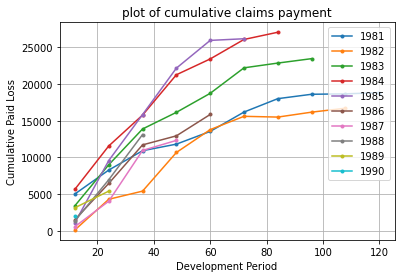

In [11]:
dev_triangle.T.plot(
    marker='.', grid=True,
    title='plot of cumulative claims payment').set(
    xlabel='Development Period', ylabel='Cumulative Paid Loss');

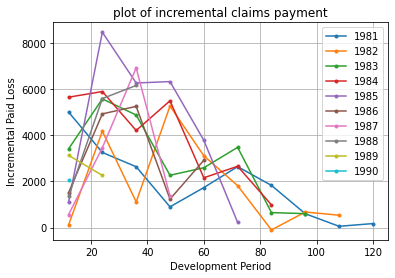

In [12]:

dev_triangle_inc.T.plot(
    marker='.', grid=True,
    title='plot of incremental claims payment').set(
    xlabel='Development Period', ylabel='Incremental Paid Loss');

Deterministic methods

Chain Ladder Method


In [13]:
dev_triangle.is_cumulative

True

In [14]:
#fitting the development triangle into the chain ladder fit method
modeltriangle = cl.Chainladder().fit(dev_triangle)
modeltriangle

Chainladder()

In [15]:
ibnr_values = (modeltriangle.full_triangle_.cum_to_incr()- dev_triangle.cum_to_incr())
ibnr_values

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,,,,,,,,,,,,
1982,,,,,,,,,,154,,
1983,,,,,,,,,397,220,,
1984,,,,,,,,900,474,262,,
1985,,,,,,,"1,098",907,477,264,,
1986,,,,,,"1,797",740,612,322,178,,
1987,,,,,"2,114","1,636",674,557,293,162,,
1988,,,,"3,552","2,861","2,214",912,753,396,219,,
1989,,,"3,364","2,373","1,911","1,479",609,503,265,147,,
1990,,"4,125","3,858","2,721","2,192","1,696",698,577,304,168,,


In [16]:
#cumulative estimated full triangle
full_triangle = modeltriangle.full_triangle_
full_triangle

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834","18,834","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704","16,858","16,858","16,858"
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466","23,863","24,083","24,083","24,083"
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067","27,967","28,441","28,703","28,703","28,703"
1985,"1,092","9,565","15,836","22,169","25,955","26,180","27,278","28,185","28,663","28,927","28,927","28,927"
1986,"1,513","6,445","11,702","12,935","15,852","17,649","18,389","19,001","19,323","19,501","19,501","19,501"
1987,557,"4,020","10,946","12,314","14,428","16,064","16,738","17,294","17,587","17,749","17,749","17,749"
1988,"1,351","6,947","13,112","16,664","19,525","21,738","22,650","23,403","23,800","24,019","24,019","24,019"
1989,"3,133","5,395","8,759","11,132","13,043","14,521","15,130","15,634","15,898","16,045","16,045","16,045"
1990,"2,063","6,188","10,046","12,767","14,959","16,655","17,353","17,931","18,234","18,402","18,402","18,402"


In [17]:
#incremental estimated full triangle
full_triangle.cum_to_incr()

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172,,
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,154,,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,397,220,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,900,474,262,,
1985,"1,092","8,473","6,271","6,333","3,786",225,"1,098",907,477,264,,
1986,"1,513","4,932","5,257","1,233","2,917","1,797",740,612,322,178,,
1987,557,"3,463","6,926","1,368","2,114","1,636",674,557,293,162,,
1988,"1,351","5,596","6,165","3,552","2,861","2,214",912,753,396,219,,
1989,"3,133","2,262","3,364","2,373","1,911","1,479",609,503,265,147,,
1990,"2,063","4,125","3,858","2,721","2,192","1,696",698,577,304,168,,


In [18]:
ultimate_loss= full_triangle.latest_diagonal

In [19]:
#taking ultimate loss on all years
print("total sum of ultimate loss is")
ultimate_sum= ultimate_loss.sum()
print(ultimate_sum)


total sum of ultimate loss is
213122.22826121017


In [20]:
#sum total of paid loss
print("sum total of paid loss:")
paid_sum = latest_paid.sum()
print(paid_sum)

sum total of paid loss:
160987.0


In [21]:
#sum of total of IBNR loss
print("outstanding or ibnr total loss is")
ibnr_sum = ultimate_sum-paid_sum
print(ibnr_sum)

outstanding or ibnr total loss is
52135.22826121017


Tail_factors

In [22]:
tail = cl.TailCurve().fit(dev_triangle)
print("cumulative development factors")
print(tail.cdf_)
print("Loss development factors")
print(tail.ldf_)
print("Tail estimates of next two years")
tail.cdf_[~tail.ldf_.development.isin(dev_triangle.link_ratio.development)]

cumulative development factors
         12-Ult    24-Ult    36-Ult    48-Ult    60-Ult    72-Ult    84-Ult    96-Ult   108-Ult   120-Ult   132-Ult
(All)  9.004403  3.002109  1.849133  1.454993  1.241806  1.115343  1.070454  1.035993  1.018739  1.009436  1.005006
Loss development factors
          12-24     24-36     36-48     48-60     60-72     72-84     84-96    96-108   108-120   120-132   132-144
(All)  2.999359  1.623523  1.270888  1.171675  1.113385  1.041935  1.033264  1.016936  1.009217  1.004408  1.005006
Tail estimates of next two years


,120-Ult,132-Ult
(All),1.0094,1.0050


Mack Chain Ladder


In [23]:
data = cl.load_sample('raa')
mack = cl.MackChainladder()
dev=cl.Development(average='volume')
mack.fit(dev.fit_transform(data))
mack

MackChainladder()

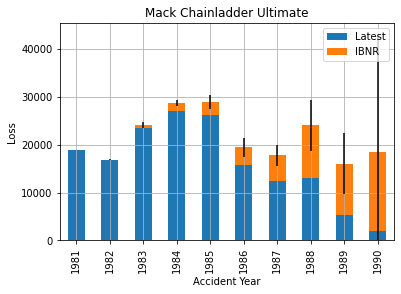

In [24]:
plot_data = mack.summary_.to_frame()
g = plot_data[['Latest', 'IBNR']].plot(
    kind='bar', stacked=True, ylim=(0, None), grid=True,
    yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                       'IBNR': plot_data['Mack Std Err']}),
    title='Mack Chainladder Ultimate').set(
    xlabel='Accident Year', ylabel='Loss');

In [25]:
mack.parameter_risk_ #getting the parameters risk of ibnr

,12,24,36,48,60,72,84,96,108,120,9999
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,98.23,98.23
1983,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,353.30,383.18,383.18
1984,0.00,0.00,0.00,0.00,0.00,0.00,0.00,132.14,441.99,476.39,476.39
1985,0.00,0.00,0.00,0.00,0.00,0.00,591.09,625.10,764.31,789.56,789.56
1986,0.00,0.00,0.00,0.00,0.00,560.79,707.25,736.27,801.53,816.86,816.86
1987,0.00,0.00,0.00,0.00,312.65,617.82,738.87,767.80,823.08,837.08,837.08
1988,0.00,0.00,0.00,"1,186.61","1,453.28","1,759.32","1,897.66","1,963.90","2,028.01","2,051.48","2,051.48"
1989,0.00,0.00,732.84,"1,223.00","1,460.57","1,690.37","1,791.51","1,852.57","1,898.59","1,918.37","1,918.37"
1990,0.00,"2,331.61","3,877.61","5,011.17","5,880.40","6,568.50","6,854.27","7,082.77","7,207.79","7,275.01","7,275.01"


In [26]:
#finding out reserve variability of mack
mack.mack_std_err_[mack.mack_std_err_.development==mack.mack_std_err_.development.max()] 

,9999
1981,
1982,143
1983,592
1984,713
1985,"1,452"
1986,"1,995"
1987,"2,204"
1988,"5,354"
1989,"6,332"
1990,"24,566"


In [27]:
mack.summary_ #finding out summary of mack



,Latest,IBNR,Ultimate,Mack Std Err
1981,"18,834",,"18,834",
1982,"16,704",154,"16,858",143
1983,"23,466",617,"24,083",592
1984,"27,067","1,636","28,703",713
1985,"26,180","2,747","28,927","1,452"
1986,"15,852","3,649","19,501","1,995"
1987,"12,314","5,435","17,749","2,204"
1988,"13,112","10,907","24,019","5,354"
1989,"5,395","10,650","16,045","6,332"
1990,"2,063","16,339","18,402","24,566"


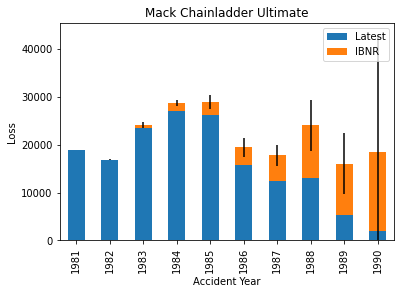

In [28]:
plot_data = mack.summary_.to_frame()
g = plot_data[['Latest', 'IBNR']] \
    .plot(kind='bar', stacked=True,
          yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                             'IBNR': plot_data['Mack Std Err']}),
          ylim=(0, None), title='Mack Chainladder Ultimate')
g.set_xlabel('Accident Year')
g.set_ylabel('Loss');



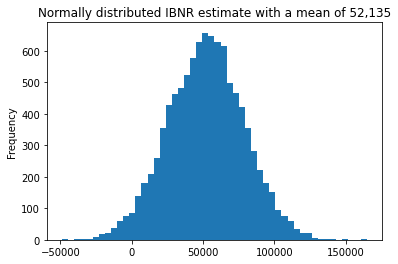

In [29]:
dist = pd.Series(np.random.normal(mack.ibnr_.sum(),
                           mack.total_mack_std_err_.values[0, 0], size=10000))
dist.plot(
    kind='hist', bins=50,
    title="Normally distributed IBNR estimate with a mean of " + '{:,}'.format(round(mack.ibnr_.sum(),0))[:-2]);

POISSON REGRESSION MODEL AND DIFFERENCE BETWEEN POISSON REGRESSION MODEL AND TRADITIONAL MODEL


12-24      3.490607
24-36      1.747333
36-48      1.457413
48-60      1.173852
60-72      1.103824
72-84      1.086269
84-96      1.053874
96-108     1.076555
108-120    1.017725
Name: Traditional, dtype: float64

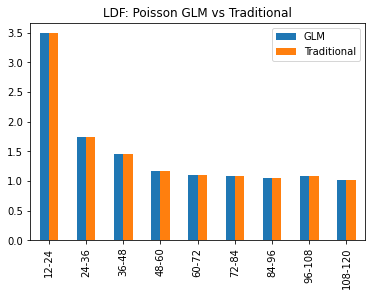

In [30]:
#taking a new dataset called genins for the poissonn regression model it is a inbuilt dataset in the  chain ladder library
genins= cl.load_sample('genins')
dev = cl.TweedieGLM(
    design_matrix = 'C(development) + C(origin)',
    link = 'log', power = 1).fit(genins)
glm = dev.ldf_.iloc[..., 0, :].T.iloc[:,0].rename('GLM')
traditional = cl.Development().fit(genins).ldf_.T.iloc[:, 0].rename('Traditional')
pd.concat((glm,traditional), 1).plot(kind='bar', title='LDF: Poisson GLM vs Traditional');
glm
traditional

OVER DISPERSED POISSON BOOTSTRAP SAMPLE

In [31]:
#performing over dispersion bootstrap samplec
raa_triangle = cl.load_sample('RAA')
genins_triangle = cl.load_sample('genins')
raa_insur = cl.BootstrapODPSample().fit_transform(raa_triangle)
sims_insur = cl.BootstrapODPSample().fit_transform(genins_triangle)
raa_insur_ldf = cl.Development().fit(raa_insur).ldf_
sims_insur_ldf = cl.Development().fit(sims_insur).ldf_
raa_insur
sims_insur
raa_insur_ldf
sims_insur_ldf

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:155: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:165: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)


,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(1000, 1, 1, 9)"
Index:,[Total]
Columns:,[values]


/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:314: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


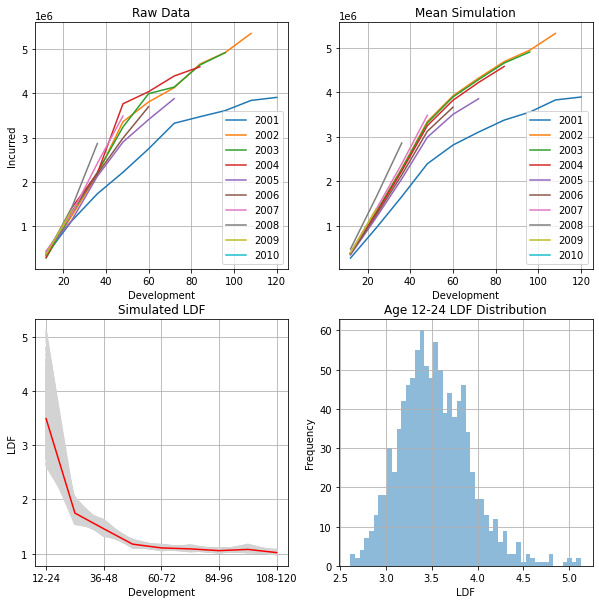

In [32]:
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
# Plot 1
genins_triangle.T.plot(ax=ax00, grid=True).set(title='Raw Data', xlabel='Development', ylabel='Incurred')
# Plot 2
sims_insur.mean().T.plot(ax=ax01, grid=True).set(title='Mean Simulation', xlabel='Development')
# Plot 3
sims_insur_ldf.T.plot(legend=False, color='lightgray', ax=ax10, grid=True).set(
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
cl.Development().fit(genins_triangle).ldf_.drop_duplicates().T.plot(
    legend=False, color='red', ax=ax10, grid=True)
# Plot 4
sims_insur_ldf.T.loc['12-24'].plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11 , grid=True).set(
    title='Age 12-24 LDF Distribution', xlabel='LDF');

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:314: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


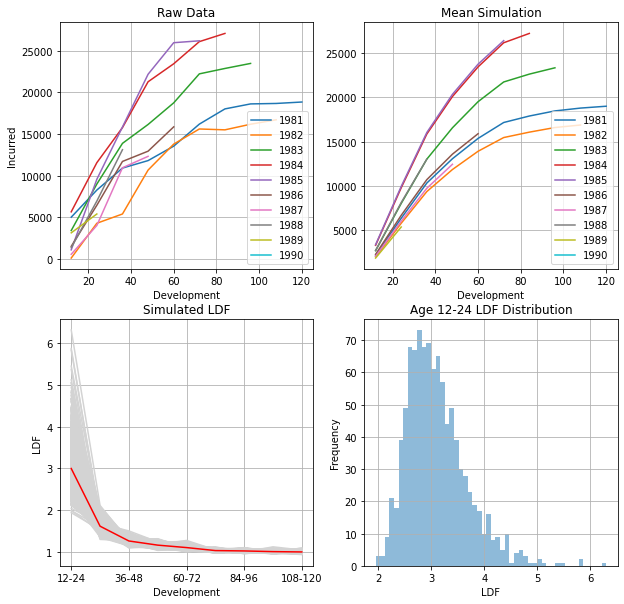

In [33]:
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
# Plot 1
raa_triangle.T.plot(ax=ax00, grid=True).set(title='Raw Data', xlabel='Development', ylabel='Incurred')
# Plot 2
raa_insur.mean().T.plot(ax=ax01, grid=True).set(title='Mean Simulation', xlabel='Development')
# Plot 3
raa_insur_ldf.T.plot(legend=False, color='lightgray', ax=ax10, grid=True).set(
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
cl.Development().fit(raa_triangle).ldf_.drop_duplicates().T.plot(
    legend=False, color='red', ax=ax10, grid=True)
# Plot 4
raa_insur_ldf.T.loc['12-24'].plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11 , grid=True).set(
    title='Age 12-24 LDF Distribution', xlabel='LDF');

ODP BOOTSTRAP MODEL COMPARISON WITH OTHER MODELS

In [34]:
triangle = cl.load_sample('raa')


In [35]:
s1 = cl.BootstrapODPSample(
    n_sims=5000, random_state=42).fit(triangle).resampled_triangles_
s1

,Triangle Summary
Valuation:,1990-12
Grain:,OYDY
Shape:,"(5000, 1, 10, 10)"
Index:,[Total]
Columns:,[values]


In [36]:
s2 = cl.BootstrapODPSample(
    drop_high=True, drop_low=True,
    n_sims=5000, random_state=42).fit_transform(triangle)
s2

/usr/local/lib/python3.7/dist-packages/chainladder/development/base.py:136: UserWarning: Some exclusions have been ignored. At least 1 (use preserve = ...) link ratio(s) is required for development estimation.
  warnings.warn(warning)


,Triangle Summary
Valuation:,1990-12
Grain:,OYDY
Shape:,"(5000, 1, 10, 10)"
Index:,[Total]
Columns:,[values]


In [37]:
results = cl.Chainladder().fit(s1).ibnr_.sum('origin').rename('columns', ['Original'])
# Add another column to triangle with second set of results.
results['Dropped'] = cl.Chainladder().fit(s2).ibnr_.sum('origin')

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:155: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:165: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:127: RuntimeWarning:

[Text(0.5, 0, 'Ultimate')]

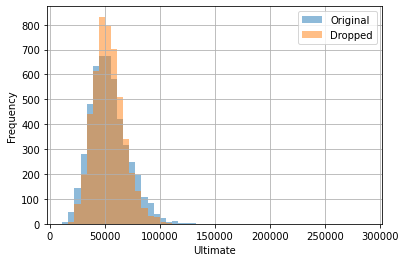

In [38]:
results.to_frame().plot(kind='hist', bins=50, alpha=0.5, grid=True).set(
    xlabel='Ultimate')

In [39]:
tri_first_lags = triangle[triangle.development<=24][triangle.origin<'1990']

Chain ladder in linear regression format

In [40]:
import statsmodels.api as sm
import numpy as np
y = tri_first_lags .to_frame().values[:, 1]
X = tri_first_lags .to_frame().values[:, 0]

model = sm.WLS(y, X, weights=(1/X)**2)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            WLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              3.980
Date:                Sat, 11 Dec 2021   Prob (F-statistic):                      0.0812
Time:                        04:44:45   Log-Likelihood:                         -100.71
No. Observations:                   9   AIC:                                      203.4
Df Residuals:                       8   BIC:                                      203.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.2061      4.113      1.995      0.081      -1.280      17.692
==============================================================================
Omnibus:                       22.767   Durbin-Watson:                   2.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.618
Skew:                           2.285   Prob(JB):                      0.00182
Kurtosis:                       6.572   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
tri_first_lags.link_ratio.to_frame().mean().values[0]

8.206099279541355

In [42]:
dev = cl.Development(average='simple').fit(triangle)
dev

Development(average='simple')

In [43]:
dev.std_err_



,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),4.1135,0.1676,0.1198,0.0273,0.0334,0.0251,0.0050,0.0151,0.0031


In [44]:
dev.sigma_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),12.3405,0.4741,0.3171,0.0668,0.0747,0.0502,0.0086,0.0213,0.0031


USING DETERMINISTIC METHODS WITH BOOTSTRAP SAMPLES(BOOTSTRAP-CHAINLADDER)

In [45]:
#TAKING NEW  SAMPLES  because bootstrap samples imposes less data constraints than mack data samples
samples = cl.BootstrapODPSample(n_sims=10000).fit(triangle).resampled_triangles_
samples = cl.BootstrapODPSample(n_sims=10000).fit_transform(triangle)

In [46]:
difference = round(1 - cl.Chainladder().fit(samples).ibnr_.sum('origin').mean() / \
                       cl.Chainladder().fit(triangle).ibnr_.sum())
print("Percentage difference in estimate using original triangle and BootstrapODPSample is " +str(difference))

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:155: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:165: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:127: RuntimeWarning:

Percentage difference in estimate using original triangle and BootstrapODPSample is 0


In [47]:
samples

,Triangle Summary
Valuation:,1990-12
Grain:,OYDY
Shape:,"(10000, 1, 10, 10)"
Index:,[Total]
Columns:,[values]


In [48]:
pipe = cl.Pipeline([
    ('dev', cl.Development(average='simple')),
    ('tail', cl.TailConstant(1.05))])
pipe.fit(samples)

/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)


Pipeline(steps=[('dev', Development(average='simple')),
                ('tail', TailConstant(tail=1.05))])

In [49]:
pipe.named_steps.dev.cdf_



,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(10000, 1, 1, 9)"
Index:,[Total]
Columns:,[values]


12-24 LDF of original Triangle: 8.2061


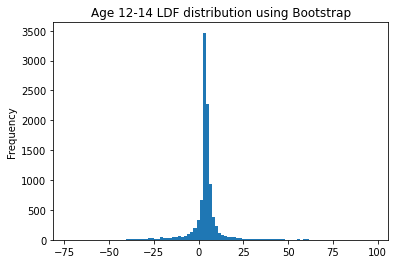

In [50]:
orig_dev = cl.Development(average='simple').fit(triangle)
resampled_ldf = pipe.named_steps.dev.ldf_
print("12-24 LDF of original Triangle: " + str(round(orig_dev.ldf_.values[0,0,0,0],4)))
pd.Series(resampled_ldf.values[:, 0, 0, 0]).plot(
    kind='hist', bins=100,
    title='Age 12-14 LDF distribution using Bootstrap')

Comparison between bootstrap and mack

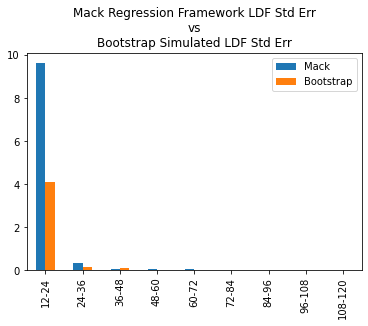

In [51]:
mack_vs_bs = resampled_ldf.std('index').to_frame().append(
    orig_dev.std_err_.to_frame()).T
mack_vs_bs.columns = ['Mack', 'Bootstrap']
mack_vs_bs.plot(kind='bar', title='Mack Regression Framework LDF Std Err\nvs\nBootstrap Simulated LDF Std Err')

In [52]:
ibnr = cl.Chainladder().fit(samples).ibnr_.sum('origin')
ibnr_99 = ibnr.quantile(q=0.99)
print("99%-ile of reserve estimate is " +'{:0,}'.format(round(ibnr_99,0)))

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:155: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:165: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:127: RuntimeWarning:

99%-ile of reserve estimate is 108,359.0


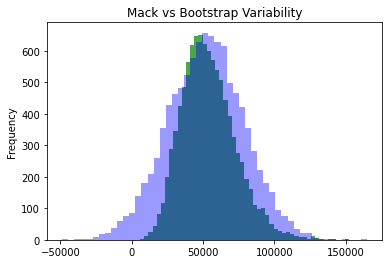

In [53]:
ax = ibnr.plot(kind='hist', bins=50, alpha=0.7, color='green').plot()
dist.plot(kind='hist', bins=50, alpha=0.4, color='blue', title='Mack vs Bootstrap Variability');

MULTIVARIATE CHAIN LADDDERS

In [54]:
clrd = cl.load_sample("clrd").groupby("LOB").sum()["CumPaidLoss"]
print("Fitting to " + str(len(clrd.index)) + " industries simultaneously.")
cl.Development().fit_transform(clrd).cdf_

Fitting to 6 industries simultaneously.


,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(6, 1, 1, 9)"
Index:,[LOB]
Columns:,[CumPaidLoss]


In [55]:
print(cl.Development(average="simple").fit(clrd.loc["wkcomp"]))
print(cl.Development(n_periods=4).fit(clrd.loc["ppauto"]))
print(cl.Development(average="regression", n_periods=6).fit(clrd.loc["comauto"]))

Development(average='simple')
Development(n_periods=4)
Development(average='regression', n_periods=6)
